In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
plt.style.use ("dark_background")

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
list(data.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [6]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Age', ylabel='HeartDisease'>

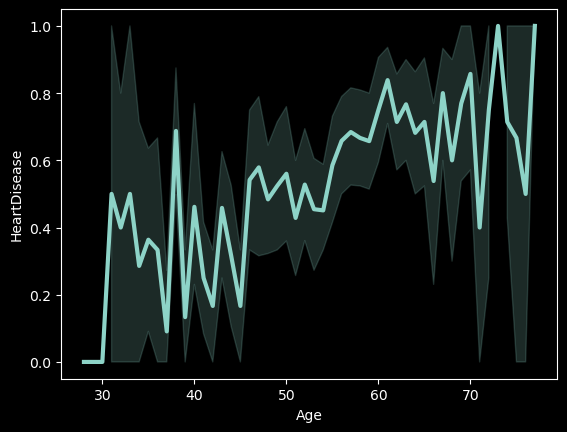

In [8]:
sns.lineplot(x =data['Age'] , y = data['HeartDisease'],data=data , linewidth = 3)

<Axes: xlabel='Age', ylabel='Sex'>

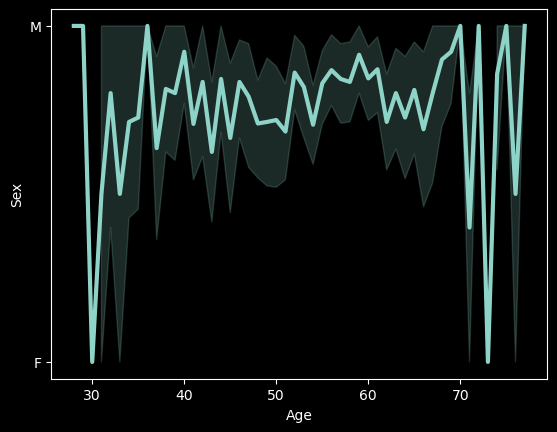

In [9]:
sns.lineplot(x =data['Age'] , y = data['Sex'],data=data , linewidth = 3)

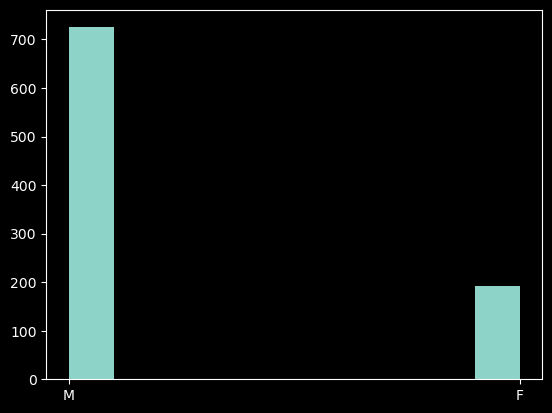

In [10]:
plt.hist(data['Sex'])
plt.show()

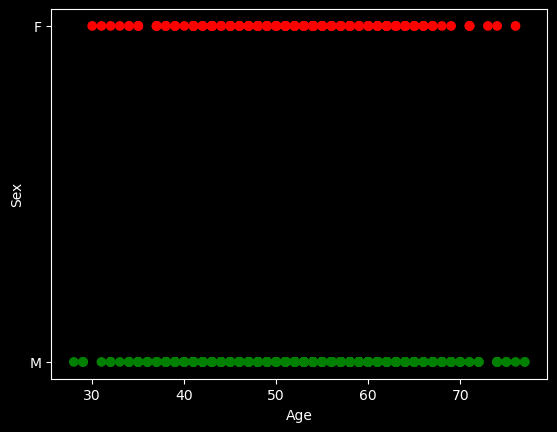

In [11]:
colors = data['Sex'].apply(lambda x: 'red' if x == 'F' else 'green')
plt.scatter(data['Age'], data['Sex'], color=colors)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

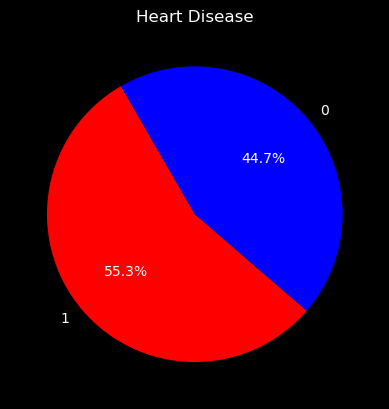

In [12]:
HeartDisease = data['HeartDisease'].value_counts()
plt.pie(HeartDisease, labels=HeartDisease.index,startangle = 120 , autopct='%1.1f%%' , colors = ["red","blue"])
plt.title('Heart Disease')
plt.show()

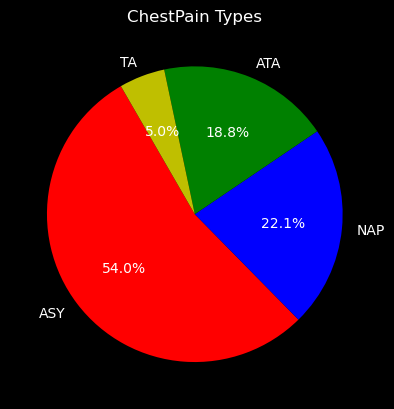

In [13]:
ChestPainType = data['ChestPainType'].value_counts()
plt.pie(ChestPainType, labels=ChestPainType.index,startangle = 120 , autopct='%1.1f%%' , colors = ["red","blue","Green","y"])
plt.title('ChestPain Types')
plt.show()

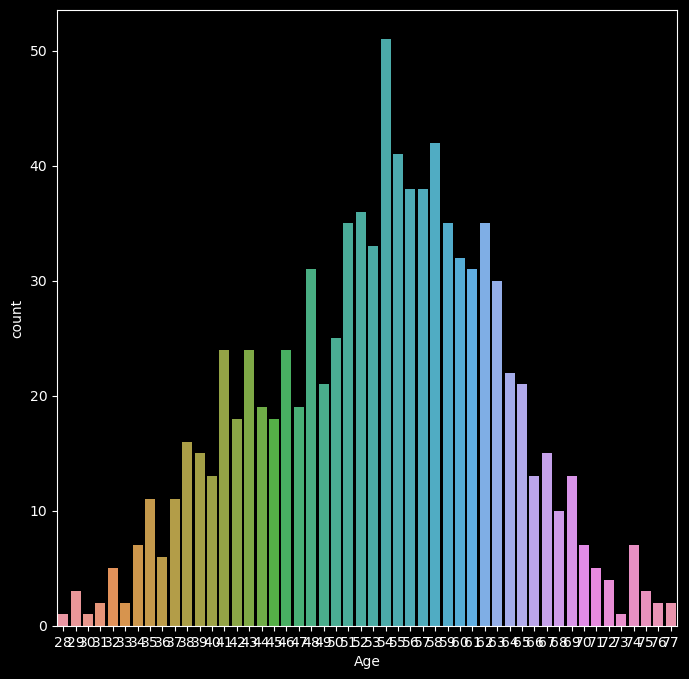

In [45]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data, x='Age')
plt.show()

(array([173.,   0.,   0., 203.,   0.,   0., 496.,   0.,   0.,  46.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

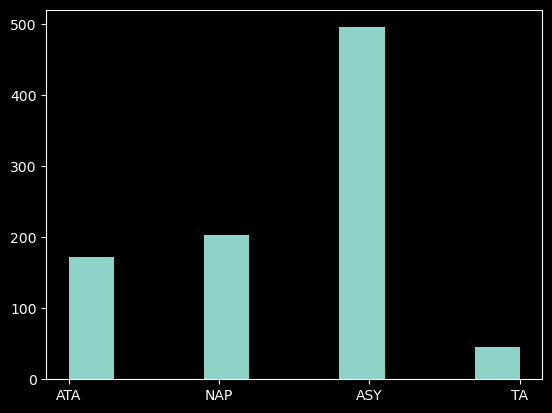

In [15]:
plt.hist(data['ChestPainType'])

C:\Users\Rishabh Acharya\AppData\Local\Temp\ipykernel_21648\3111195173.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


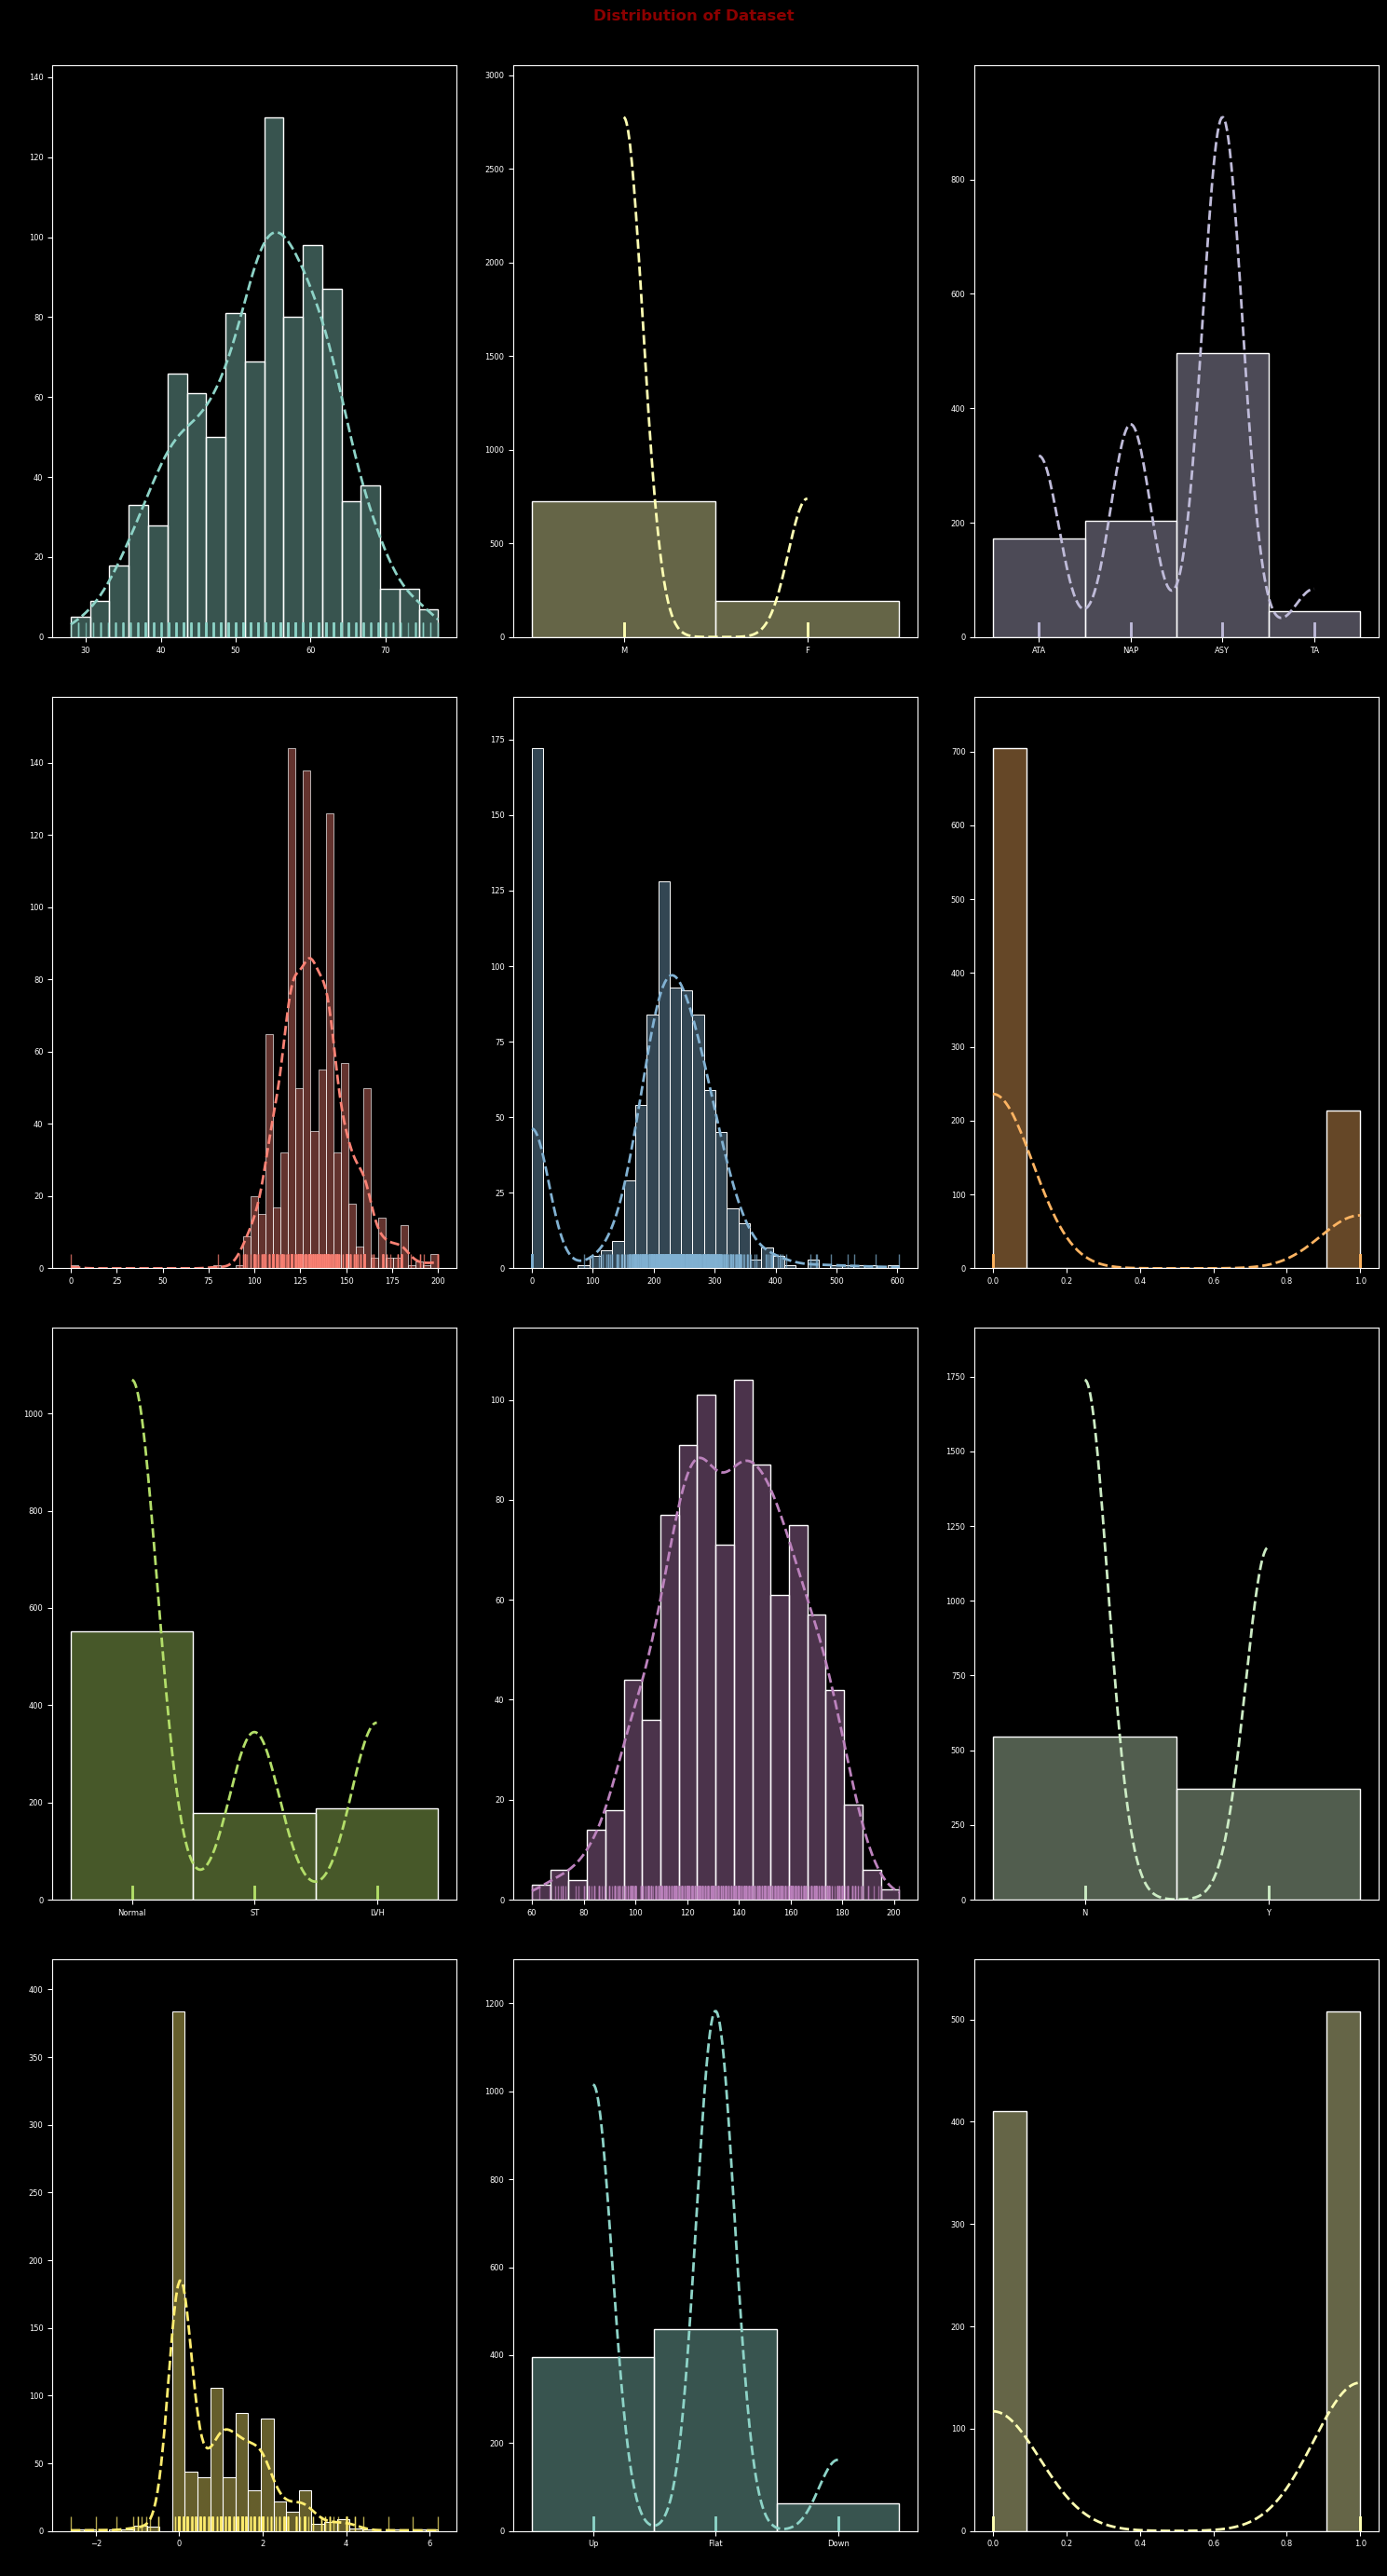

In [16]:
# Creating Subplots
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 30))
axes = axes.flat

color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(data):
    sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(data,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)

fig.suptitle('Distribution of Dataset', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

# Encoding

In [17]:
objects = data.select_dtypes(include=['object'])
objects

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [18]:
ints = data.select_dtypes(exclude=['object'])
ints

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [19]:
LE = LabelEncoder()
for i in (objects):
    objects[i] = LE.fit_transform(objects[i])
data = pd.concat([ints,objects],axis=1)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


<Axes: >

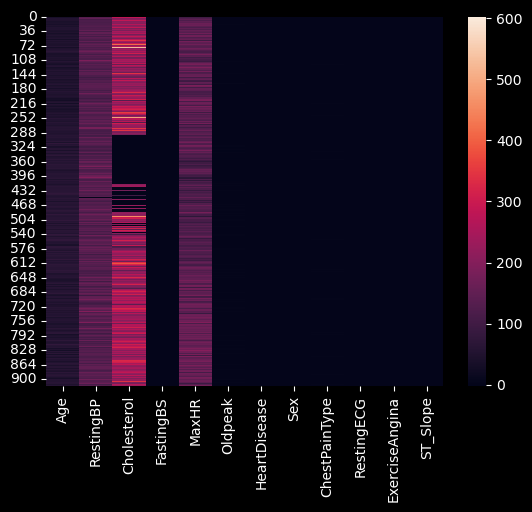

In [20]:
sns.heatmap(data)

<Axes: ylabel='Count'>

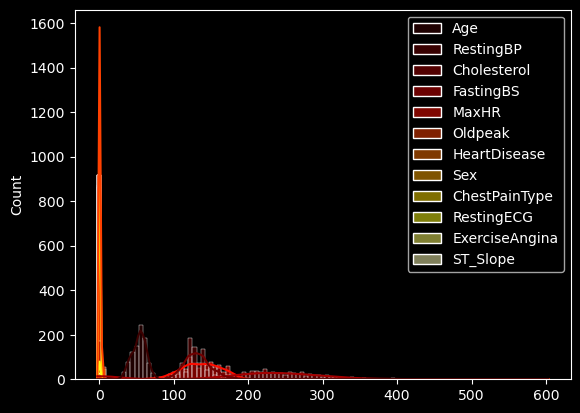

In [21]:
sns.histplot(data=data,kde=True,palette='hot')

In [22]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,0.404139,1.361656
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.490992,0.607056
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


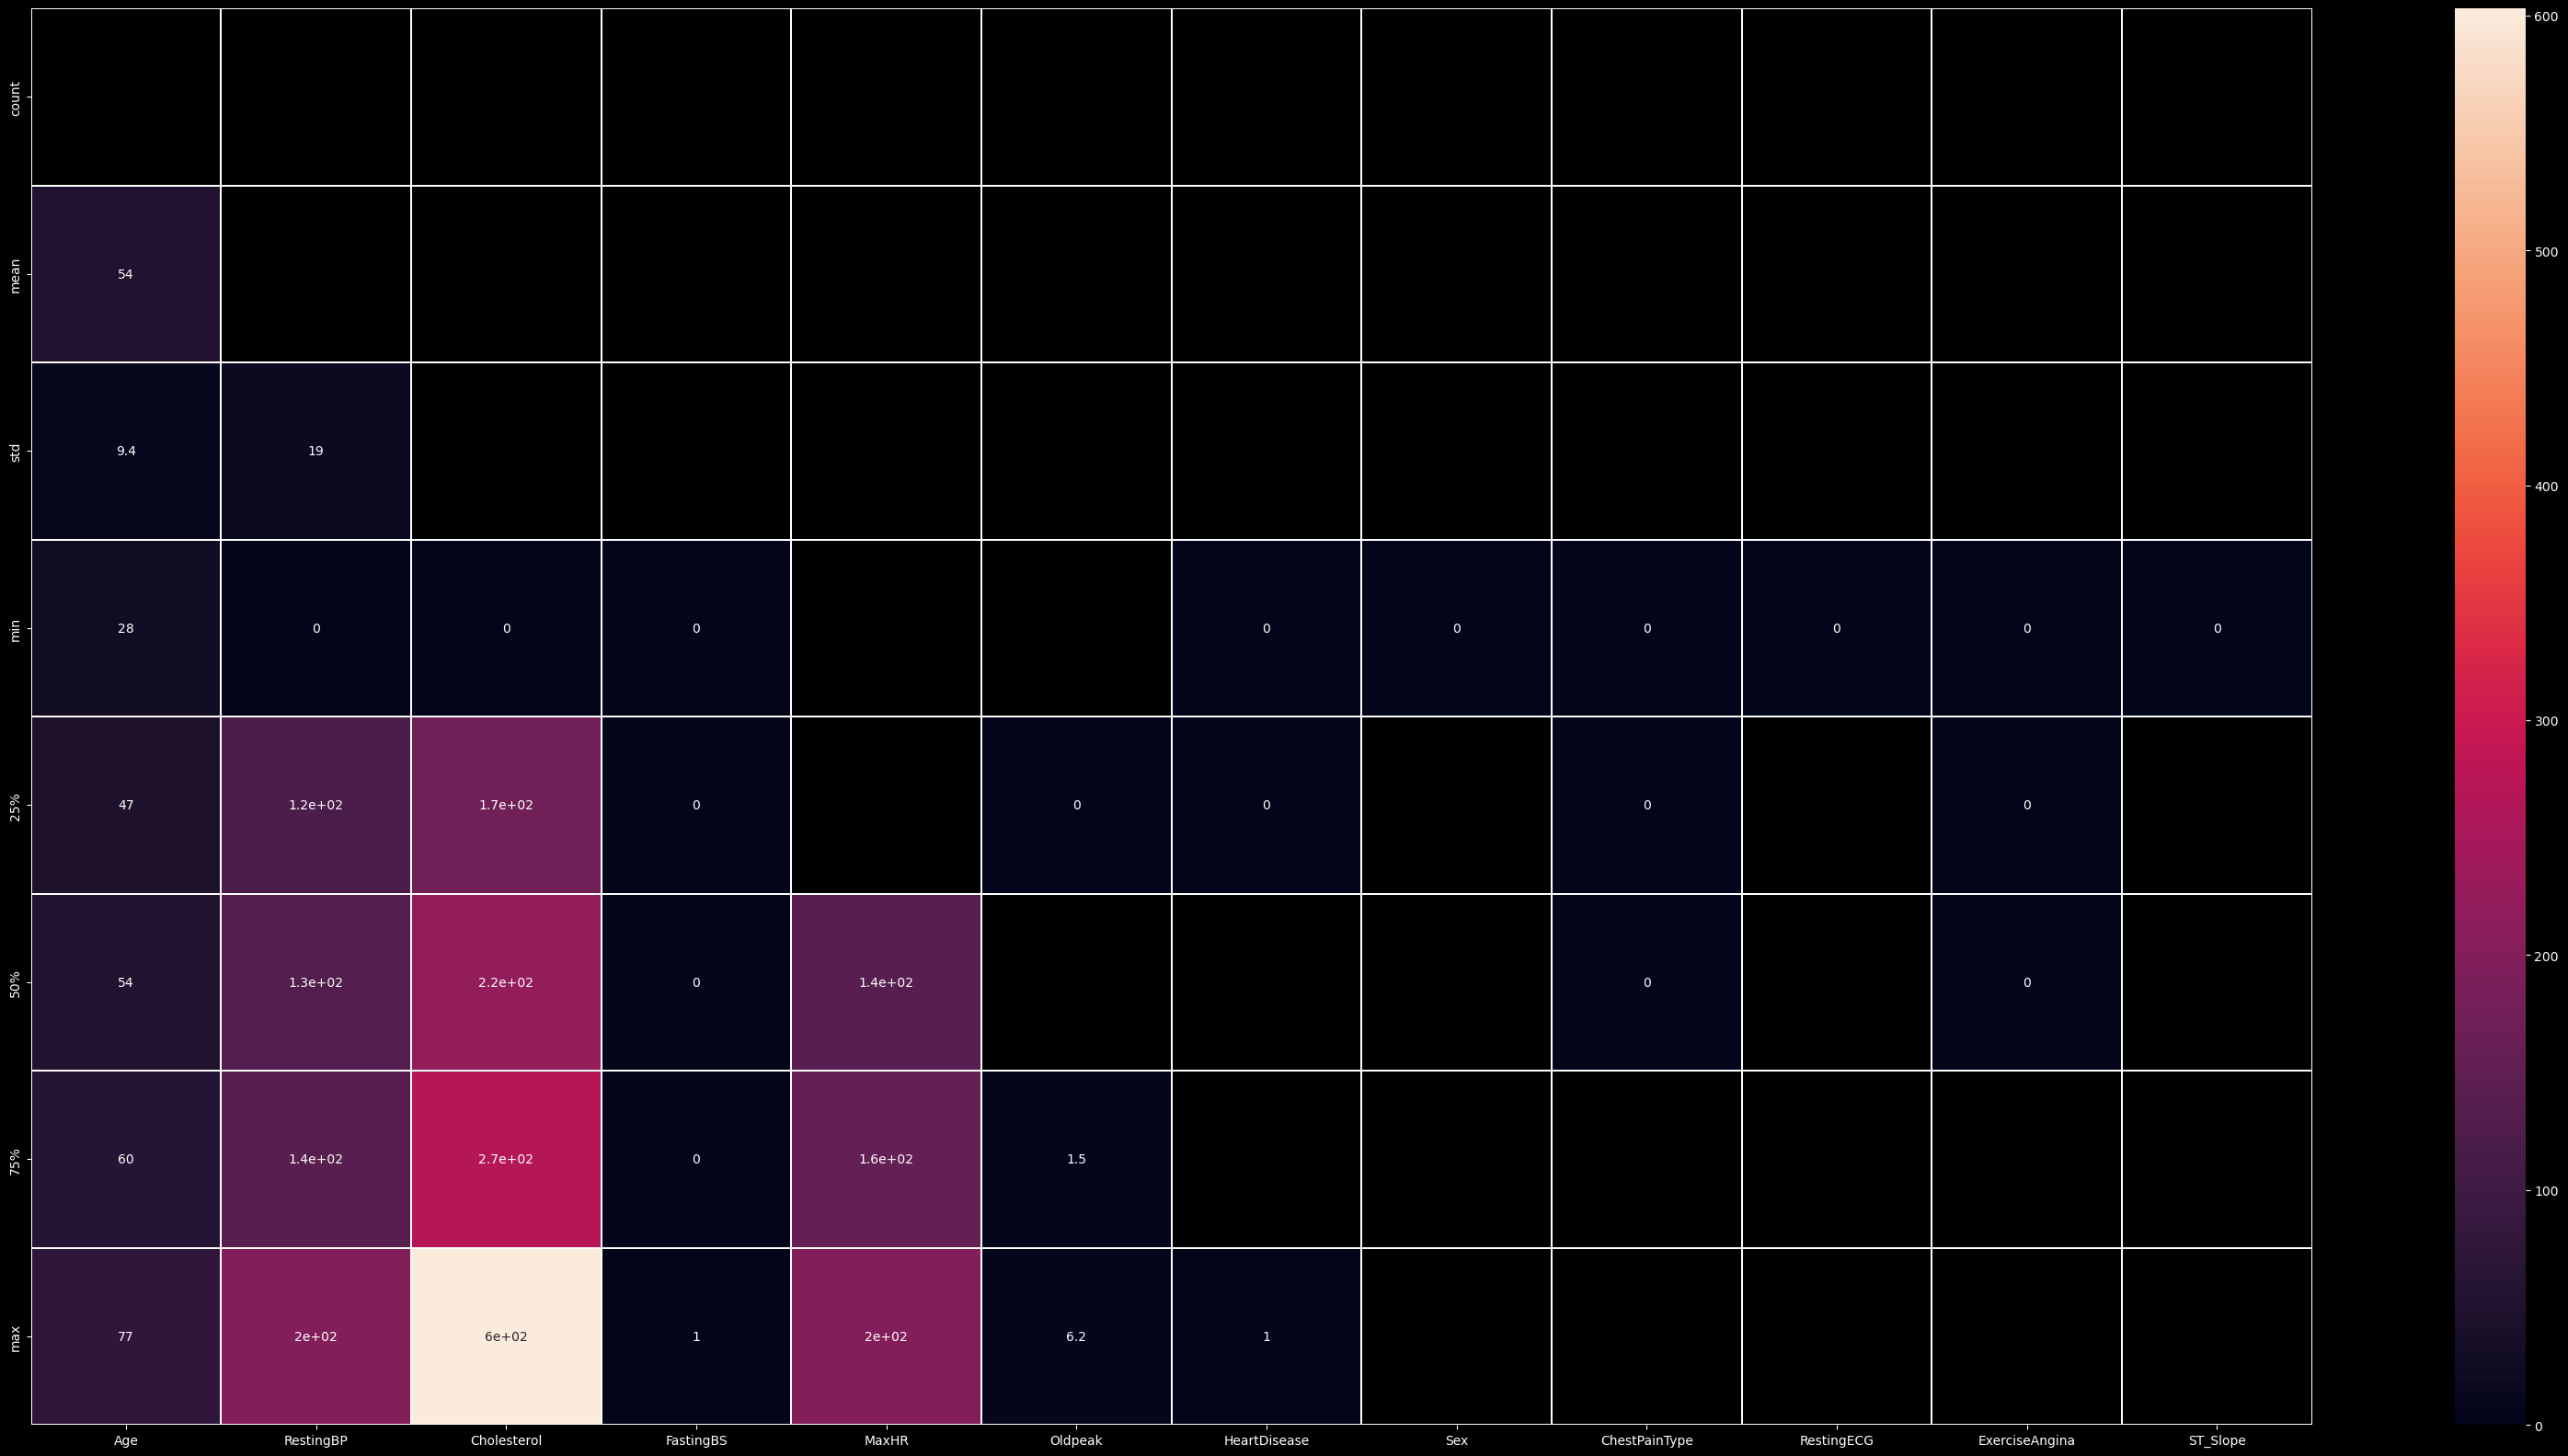

In [23]:
plt.figure(figsize=(40, 20))
matrix = np.triu(data.describe())
sns.heatmap(data.describe(), annot=True, linewidth=.10, mask=matrix);

<Axes: ylabel='Count'>

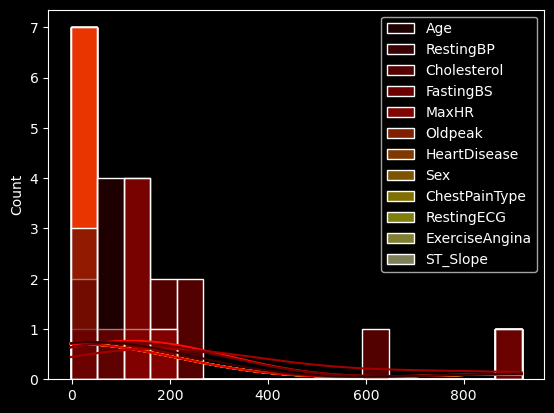

In [24]:
sns.histplot(data=data.describe(),kde=True,palette='hot')

<Axes: >

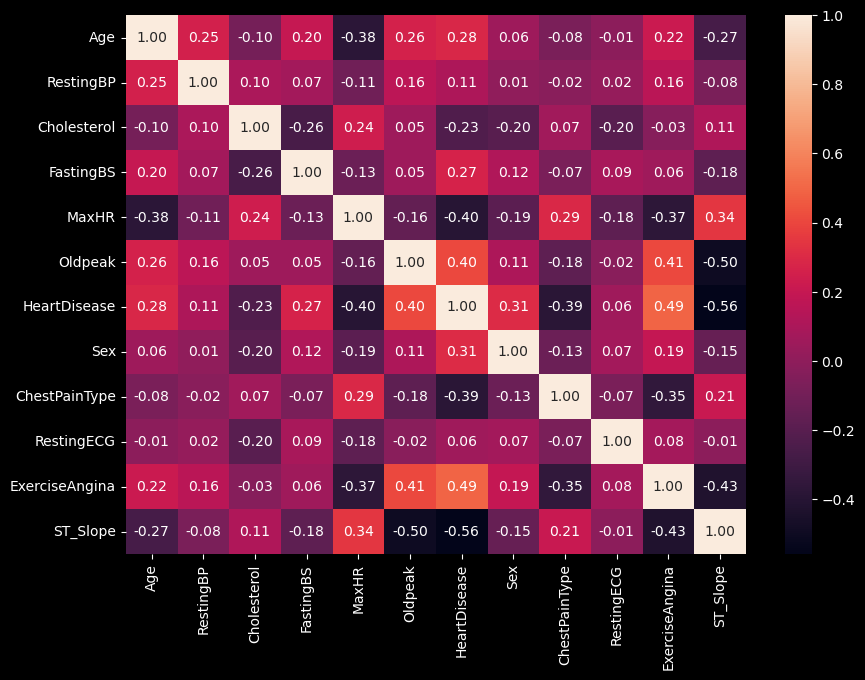

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

<Axes: ylabel='Count'>

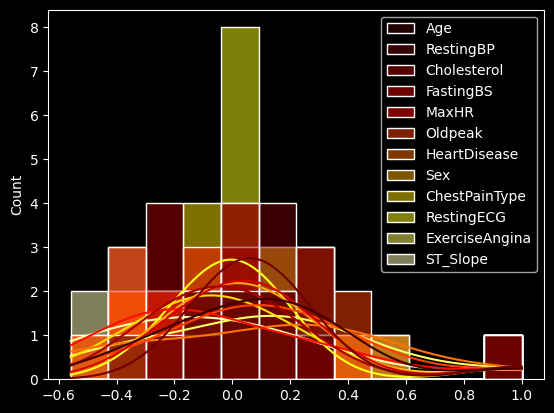

In [26]:
sns.histplot(data=data.corr(),kde=True,palette='hot')

# Splitting Data to Inputs & Outputs

In [27]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


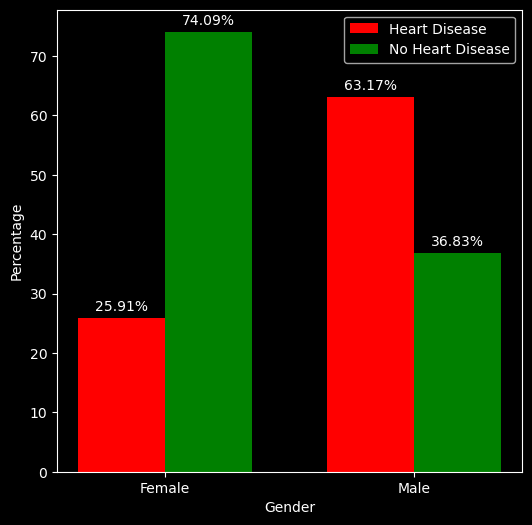

In [28]:
hasHeartDisease = [data[(data['Sex'] == 0) & (data['HeartDisease'] == 1)].shape[0], data[(data['Sex'] == 1) & (data['HeartDisease'] == 1)].shape[0]]
notHeartDisease = [data[(data['Sex'] == 0) & (data['HeartDisease'] == 0)].shape[0], data[(data['Sex'] == 1) & (data['HeartDisease'] == 0)].shape[0]]

gender_counts = data.groupby('Sex')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.35
index = range(len(gender_counts))

bars1 = ax.bar(index, gender_counts[1], bar_width, label='Heart Disease', color='red')
bars2 = ax.bar([i + bar_width for i in index], gender_counts[0], bar_width, label='No Heart Disease', color='green')

label_map = {0: 'Female', 1: 'Male'}
new_labels = [label_map[label] for label in gender_counts.index]

# Adding labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
# ax.set_title('Percentage of People with Heart Disease by Gender')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Displaying the plot
plt.savefig('sex_heartdisease.png')
plt.show()


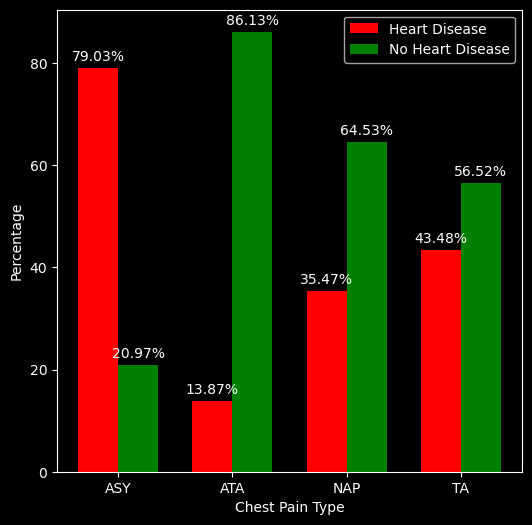

In [29]:
chestpain_counts = data.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph with adjusted figsize
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.35
index = range(len(chestpain_counts))

bars1 = ax.bar(index, chestpain_counts[1], bar_width, label='Heart Disease', color='red')
bars2 = ax.bar([i + bar_width for i in index], chestpain_counts[0], bar_width, label='No Heart Disease', color='green')

# Mapping old labels to new labels
label_map = {0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}
new_labels = [label_map[label] for label in chestpain_counts.index]

# Adding labels and title
ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Percentage')
# ax.set_title('Percentage of People with Heart Disease by Chest Pain')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend()

# Adding labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Displaying the plot
plt.savefig('chestpaintype_heartdisease.png')
plt.show()


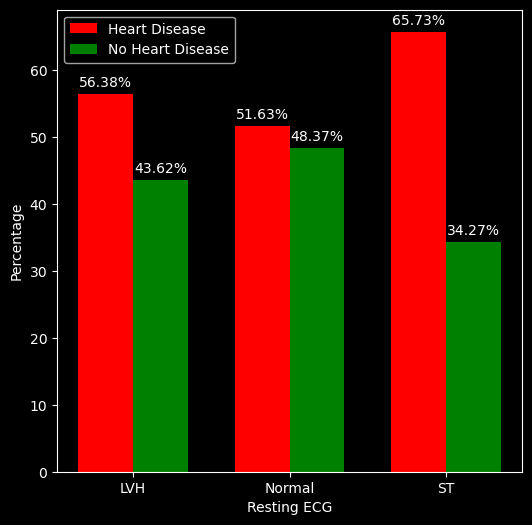

In [50]:
chestpain_counts = data.groupby('RestingECG')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph with adjusted figsize
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.35
index = range(len(chestpain_counts))

bars1 = ax.bar(index, chestpain_counts[1], bar_width, label='Heart Disease', color='red')
bars2 = ax.bar([i + bar_width for i in index], chestpain_counts[0], bar_width, label='No Heart Disease', color='green')

# Mapping old labels to new labels
label_map = {0: 'LVH', 1: 'Normal', 2: 'ST'}
new_labels = [label_map[label] for label in chestpain_counts.index]

# Adding labels and title
ax.set_xlabel('Resting ECG')
ax.set_ylabel('Percentage')
# ax.set_title('Percentage of People with Heart Disease by Chest Pain')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend()

# Adding labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Displaying the plot
plt.savefig('restingecg_heartdisease.png')
plt.show()


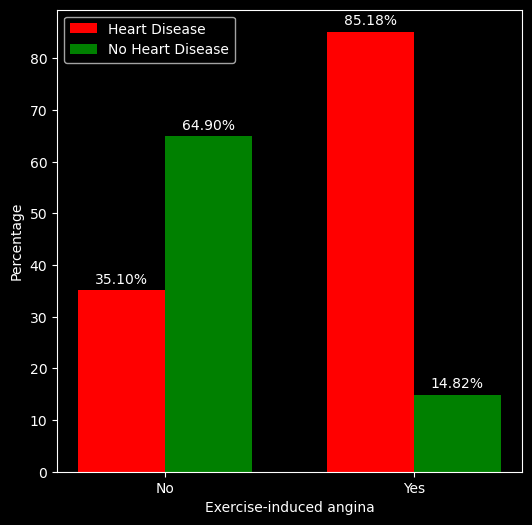

In [51]:
chestpain_counts = data.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph with adjusted figsize
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.35
index = range(len(chestpain_counts))

bars1 = ax.bar(index, chestpain_counts[1], bar_width, label='Heart Disease', color='red')
bars2 = ax.bar([i + bar_width for i in index], chestpain_counts[0], bar_width, label='No Heart Disease', color='green')

# Mapping old labels to new labels
label_map = {0: 'No', 1: 'Yes'}
new_labels = [label_map[label] for label in chestpain_counts.index]

# Adding labels and title
ax.set_xlabel('Exercise-induced angina')
ax.set_ylabel('Percentage')
# ax.set_title('Percentage of People with Heart Disease by Chest Pain')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend()

# Adding labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Displaying the plot
plt.savefig('exerciseangina_heartdisease.png')
plt.show()


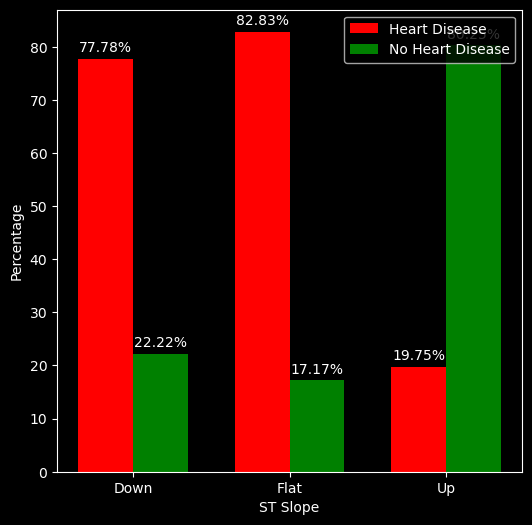

In [53]:
chestpain_counts = data.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph with adjusted figsize
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.35
index = range(len(chestpain_counts))

bars1 = ax.bar(index, chestpain_counts[1], bar_width, label='Heart Disease', color='red')
bars2 = ax.bar([i + bar_width for i in index], chestpain_counts[0], bar_width, label='No Heart Disease', color='green')

# Mapping old labels to new labels
label_map = {0: 'Down', 1: 'Flat', 2: 'Up'}
new_labels = [label_map[label] for label in chestpain_counts.index]

# Adding labels and title
ax.set_xlabel('ST Slope')
ax.set_ylabel('Percentage')
# ax.set_title('Percentage of People with Heart Disease by Chest Pain')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend(loc='best')

# Adding labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Displaying the plot
plt.savefig('stslope_heartdisease.png')
plt.show()

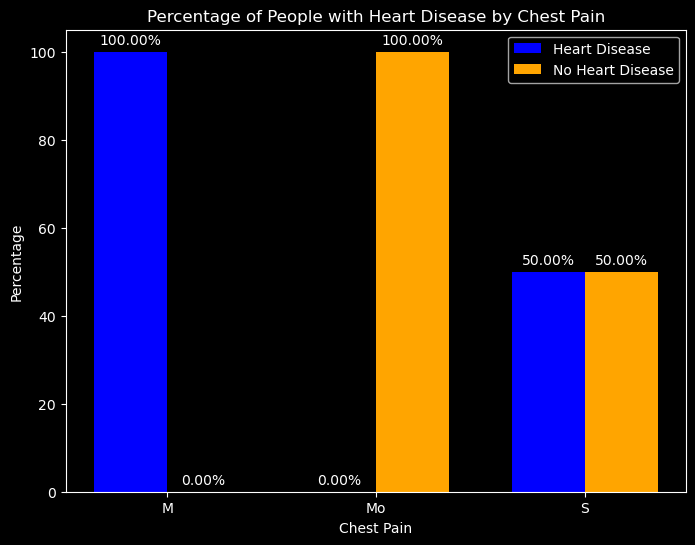

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data1 = {
    'chestpain': ['Mild', 'Moderate', 'Mild', 'Severe', 'Moderate', 'Mild', 'Severe', 'Moderate'],
    'heartdisease': [1, 0, 1, 1, 0, 1, 0, 0]  # 1 represents having heart disease, 0 represents not having heart disease
}

df = pd.DataFrame(data1)

# Grouping by chestpain and calculating percentages
chestpain_counts = df.groupby('chestpain')['heartdisease'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting the bar graph with adjusted figsize
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(chestpain_counts))

bars1 = ax.bar(index, chestpain_counts[1], bar_width, label='Heart Disease', color='blue')
bars2 = ax.bar([i + bar_width for i in index], chestpain_counts[0], bar_width, label='No Heart Disease', color='orange')

# Mapping old labels to new labels
label_map = {'Mild': 'M', 'Moderate': 'Mo', 'Severe': 'S'}
new_labels = [label_map[label] for label in chestpain_counts.index]

# Adding labels and title
ax.set_xlabel('Chest Pain')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of People with Heart Disease by Chest Pain')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(new_labels)  # Using new labels
ax.legend()

# Adding labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Displaying the plot
plt.show()


In [31]:
x = data.drop(['HeartDisease'], axis=1)
x.iloc[:, [3, 4]] = x.iloc[:, [4, 3]]
x.columns.values[[3, 4]] = x.columns.values[[4, 3]]
x

,Age,RestingBP,Cholesterol,MaxHR,FastingBS,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,172,0,0.0,1,1,1,0,2
1,49,160,180,156,0,1.0,0,2,1,0,1
2,37,130,283,98,0,0.0,1,1,2,0,2
3,48,138,214,108,0,1.5,0,0,1,1,1
4,54,150,195,122,0,0.0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,0,1.2,1,3,1,0,1
914,68,144,193,141,1,3.4,1,0,1,0,1
915,57,130,131,115,0,1.2,1,0,1,1,1
916,57,130,236,174,0,0.0,0,1,0,0,1


In [32]:
y = data['HeartDisease'].to_numpy()

In [33]:
x_arr = x.to_numpy()
x_arr.shape

x_train, x_test, y_train, y_test = train_test_split(x_arr, y, test_size=0.2, random_state=0, stratify=y)
np.bincount(y_test)
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# Scaling Data

In [34]:
sc = StandardScaler()
x_train[:, 0:4] = sc.fit_transform(x_train[:, 0:4])
x_test[:, 0:4] = sc.transform(x_test[:, 0:4])

In [35]:
colname = list(x.columns)
pd.DataFrame(x_train, columns=colname)

,Age,RestingBP,Cholesterol,MaxHR,FastingBS,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,-1.218505,-0.689006,-0.003107,0.722367,0.0,0.0,1.0,1.0,1.0,0.0,2.0
1,0.041781,0.374458,0.372390,0.916829,0.0,1.2,1.0,0.0,1.0,0.0,2.0
2,0.671923,0.427631,1.077591,-0.561076,1.0,1.7,1.0,2.0,2.0,1.0,1.0
3,0.041781,-0.476313,0.619668,-1.066675,0.0,2.2,1.0,0.0,0.0,1.0,1.0
4,0.146804,1.437921,0.857788,0.255661,1.0,2.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
729,-0.378314,-0.689006,0.189221,0.839044,0.0,1.6,0.0,2.0,1.0,0.0,1.0
730,0.146804,0.374458,0.280805,-1.027783,0.0,0.5,1.0,0.0,1.0,1.0,1.0
731,0.671923,-0.157274,-1.816481,-0.249938,1.0,1.1,1.0,0.0,2.0,1.0,0.0
732,1.092018,-1.220737,-1.816481,-0.872214,1.0,1.3,1.0,0.0,1.0,1.0,0.0


# Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

preds_test = lr.predict(x_test)
cm = confusion_matrix(y_test, preds_test)

In [37]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.91      0.84      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Model Accuracy = 87.0 %


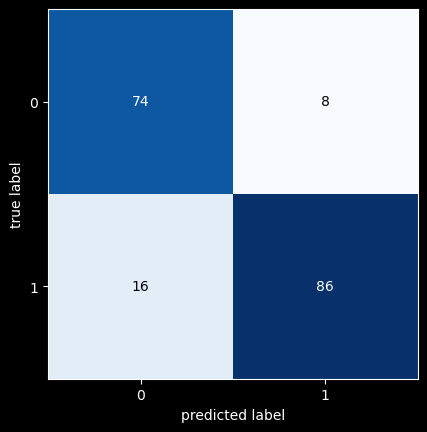

In [38]:
plot_confusion_matrix(cm)
# Model Accuracy
acc1 =np.round(accuracy_score(y_test, preds_test)*100)
plt.savefig('images/cm.png')
print("Model Accuracy =",acc1,"%")

In [39]:
# plt.figure(figsize=(10,5))
# data = [acc1,100-acc1]
# names = ['Accuracy','Error']
# plt.title (' Accuracy ',color = 'red')
# plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [40]:
# arr = np.empty(11)
# vals = [40, 140, 289, 172, 0, 0, 1, 1, 1, 0, 2]

# for i in range(11):
#     arr[i] = vals[i]

# arr = arr.reshape((1, 11))
# arr[:, 0:4] = sc.transform(arr[:, 0:4])
# print(arr)

# print(lr.predict_proba(arr)[0])

In [41]:
# import pickle
# import os

In [42]:
# cur_dir = os.getcwd()
# folder = os.path.dirname(cur_dir)
# pickle.dump(sc, open(os.path.join(folder, 'Model', 'pkl_objects', 'standardscaler.pkl'), 'wb'))
# pickle.dump(lr, open(os.path.join(folder, 'Model', 'pkl_objects', 'lr.pkl'), 'wb'))

In [43]:
# sc1 = pickle.load(open(os.path.join(folder, 'Model', 'pkl_objects', 'standardscaler.pkl'), 'rb'))
# sc1.var_